In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def load_data(folder_name, training_run):
    performance_over_time = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_performance.csv', delimiter=',')
    test_sets_used = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_test_sets_used.csv', delimiter=',')
    mutation_ranges = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_mutation_ranges.csv', delimiter=',')
    config_array = np.load(folder_name+'/training_run_'+str(training_run)+'_config.npy', allow_pickle=True)
    config = config_array.item()
    return performance_over_time, test_sets_used, mutation_ranges, config


def array_to_dict(array):
    print(array)
    return {key: value for key, value in array}


In [3]:
class Run:
    def __init__(self,performance_over_time, test_sets_used, mutation_ranges, config):
        self.performances = performance_over_time
        self.test_sets = test_sets_used
        self.mutation_ranges = mutation_ranges
        self.config = config
        



In [4]:
runs = []

training_runs = 100
for training_run in range(training_runs):
    try:
        folder_name = 'text_logs_9/run_' + str(training_run)
        performance_over_time, test_sets_used, mutation_ranges, config = load_data(folder_name, training_run)
        runs.append(Run(performance_over_time, test_sets_used, mutation_ranges, config))
    except:
        pass


runs 45


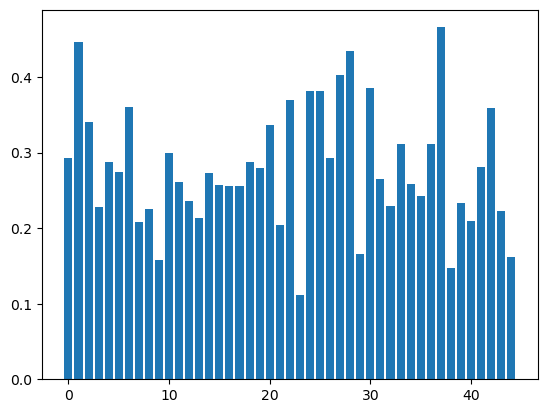

<function matplotlib.pyplot.show(close=None, block=None)>

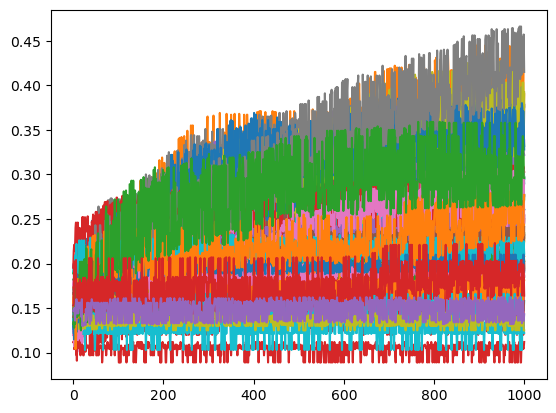

In [5]:
print("runs", len(runs))

#GRAPHING PERFORMANCES
#best performance of each run
best_performances = []
for run in runs:
    best_performances.append(run.performances.max())
    
plt.bar( range(len(best_performances)), best_performances)
plt.savefig("text_logs_9/performance_bar.pdf")
plt.show()

#performance curves of each run
performance_curves = []
for run in runs:
    performance_curves.append(run.performances.max(axis = 1))

for curve in performance_curves:
    plt.plot(curve)
plt.savefig("text_logs_9/perf_over_time.pdf")
plt.show
    


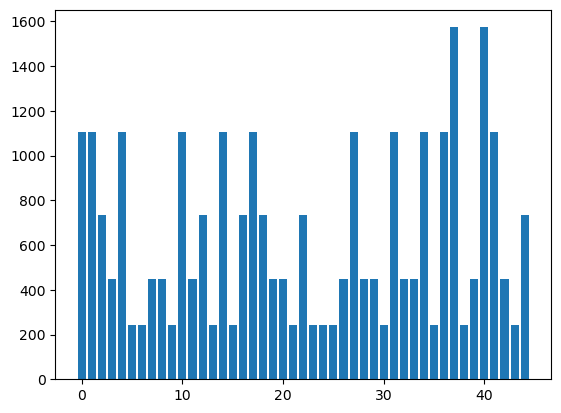

13


In [6]:
counter = 0 
ncs = []
for i in runs:
    if i.config["neuron_count"]>1000:
        counter +=1
    ncs.append(i.config["neuron_count"])

plt.bar(range(len(ncs)),ncs)
plt.show()
print(counter)

In [7]:
#grouping by moddified parameter:
def get_configuration(index):
    base_config = {
        "neuron_count": 1000,
        "connection_probability_dropoff": 3.0,
        "hidden_neuron_connections": 6,
        "inference_steps": 8,
        "n_survivors": 3,
        "activation_function": "leaky_relu",
    }

    params_to_evaluate = list(base_config.keys())
    param_index = index // 5
    run_index = index % 5

    param = params_to_evaluate[param_index]

    if param == "neuron_count":
        base_config[param] = int((np.linspace(9, 19, 5) ** 2.5)[run_index])
    elif param == "connection_probability_dropoff":
        base_config[param] = np.linspace(1, 4, 5)[run_index]
    elif param == "hidden_neuron_connections":
        base_config[param] = int(np.linspace(3, 20, 5)[run_index])
        base_config["n_closes_neurons_connection_probability"] = "n_closest"
    elif param == "inference_steps":
        base_config[param] = int(np.linspace(6, 20, 5)[run_index])
    elif param == "n_survivors":
        base_config[param] = int(np.linspace(1, 15, 5)[run_index])
    elif param == "activation_function":
        options = ["relu", "leaky_relu"]
        base_config[param] = options[run_index % len(options)]

    return base_config



def get_modified_param_string(modified_config):
    default_config = {
        "neuron_count": 1000,
        "connection_probability_dropoff": 3.0,
        "hidden_neuron_connections": 6,
        "inference_steps": 8,
        "activation_function": "leaky_relu",
        "n_survivors": 3,
    }

    modified_param = "activation_function"
    for i in default_config.keys():
        if modified_config[i] != default_config[i]:
            print(i, modified_config[i], default_config[i])
            modified_param = i
   


    default_value = default_config[modified_param]
    modified_value = modified_config[modified_param]

    if isinstance(default_value, str):
        change = f"{default_value} -> {modified_value}"
    else:
        change_amount = modified_value - default_value
        change = f"{default_value} -> {modified_value}"

    return modified_param, change


changes = []

param_groups = {}
for i in range(len(runs)):
    print(i,":")
    config_dict = runs[i].config
    mod_param, change = get_modified_param_string( config_dict)
    changes.append(get_modified_param_string( config_dict))
    if mod_param in param_groups.keys():
        param_groups[mod_param].append(runs[i])
    else:
        param_groups[mod_param] = [runs[i]]


0 :
neuron_count 1106 1000
connection_probability_dropoff 3.25 3.0
inference_steps 6 8
activation_function relu leaky_relu
n_survivors 12 3
neuron_count 1106 1000
connection_probability_dropoff 3.25 3.0
inference_steps 6 8
activation_function relu leaky_relu
n_survivors 12 3
1 :
neuron_count 1106 1000
connection_probability_dropoff 2.5 3.0
inference_steps 6 8
activation_function relu leaky_relu
n_survivors 9 3
neuron_count 1106 1000
connection_probability_dropoff 2.5 3.0
inference_steps 6 8
activation_function relu leaky_relu
n_survivors 9 3
2 :
neuron_count 733 1000
connection_probability_dropoff 2.5 3.0
inference_steps 6 8
n_survivors 12 3
neuron_count 733 1000
connection_probability_dropoff 2.5 3.0
inference_steps 6 8
n_survivors 12 3
3 :
neuron_count 448 1000
connection_probability_dropoff 1.75 3.0
inference_steps 10 8
n_survivors 6 3
neuron_count 448 1000
connection_probability_dropoff 1.75 3.0
inference_steps 10 8
n_survivors 6 3
4 :
neuron_count 1106 1000
connection_probability_

In [8]:
for i in param_groups.keys():
    print("changed:",i,"length:",len(param_groups[i]))
    

changed: n_survivors length: 45


n_survivors


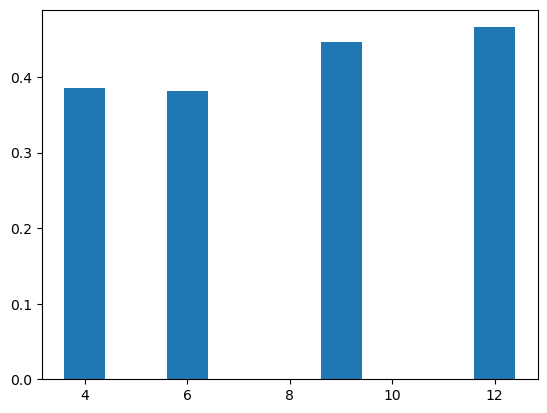

In [9]:
for key in param_groups.keys():
    print(key)
    best = []
    confs = []
    for run in param_groups[key]:
        best.append(run.performances.max())
        confs.append(run.config[key])
    plt.bar( confs, best)
    plt.show()

    

In [10]:
#extracting data from text outputs

def extract_perf_from_txt(filename):
    perf = []
    lines = open(filename).readlines()
    for line in lines:
        if line[0]=="g" and len(line)>25:
            try:
                perf.append(float(line.split(":")[-1].replace(" ", "").replace("\n","")))
            except:
                pass
    return perf


In [11]:
txt_perf = []
for i in range(100):
    txt_perf.append(extract_perf_from_txt("text_logs_9/log_"+str(i)+".txt"))
    

In [12]:
for i in txt_perf:
    if len(i)>0:
        i.pop(0)
        if i[-1]==0:
            i.pop(-1) 
    print(len(i))
    

737
635
999
636
585
999
999
999
618
944
999
622
975
358
791
999
999
999
999
622
999
999
358
715
836
999
976
359
999
999
909
933
792
999
999
975
635
586
999
941
919
457
919
999
751
999
999
455
999
508
752
738
400
999
999
958
635
999
999
776
999
936
923
621
999
999
635
502
999
999
999
999
999
999
919
792
500
919
918
968
999
999
976
494
999
793
999
558
999
498
999
613
458
382
999
999
460
999
999
999


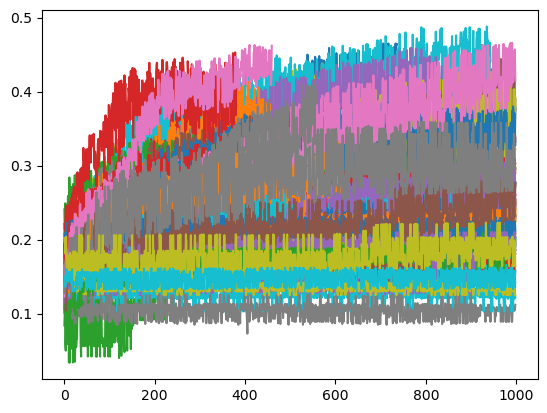

In [13]:
import matplotlib.pyplot as plt
for i in txt_perf:
    plt.plot(i)
plt.savefig("text_logs_9/incomplete_performances.pdf")    
plt.show()

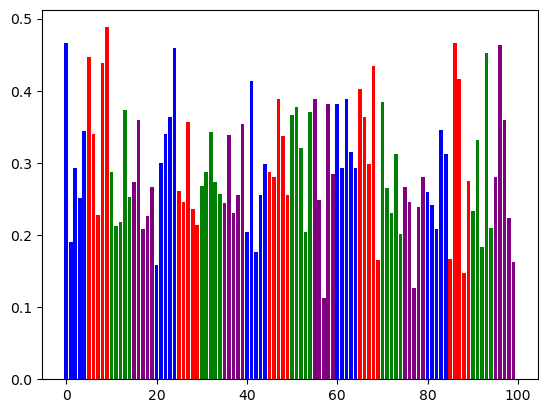

In [14]:
bests = []
for i in txt_perf:
    if len(i)>0:
        bests.append(max(i))
    else:
        bests.append(0)

# Define colors
colors = ['blue', 'blue', 'blue', 'blue', 'blue',
          'red', 'red', 'red', 'red', 'red',
          'green', 'green', 'green', 'green', 'green',
          'purple', 'purple', 'purple', 'purple', 'purple'] * ((len(bests) // 20) + 1)

plt.bar(range(len(bests)), bests, color=colors[:len(bests)])
plt.show()

neuron_count 243 1000
neuron_count 448 1000
neuron_count 733 1000
neuron_count 1105 1000
neuron_count 1573 1000
connection_probability_dropoff 1.0 3.0
connection_probability_dropoff 1.75 3.0
connection_probability_dropoff 2.5 3.0
connection_probability_dropoff 3.25 3.0
connection_probability_dropoff 4.0 3.0
hidden_neuron_connections 3 6
hidden_neuron_connections 7 6
hidden_neuron_connections 11 6
hidden_neuron_connections 15 6
hidden_neuron_connections 20 6
inference_steps 6 8
inference_steps 9 8
inference_steps 13 8
inference_steps 16 8
inference_steps 20 8
n_survivors 1 3
n_survivors 4 3
n_survivors 8 3
n_survivors 11 3
n_survivors 15 3
activation_function relu leaky_relu
activation_function relu leaky_relu
activation_function relu leaky_relu


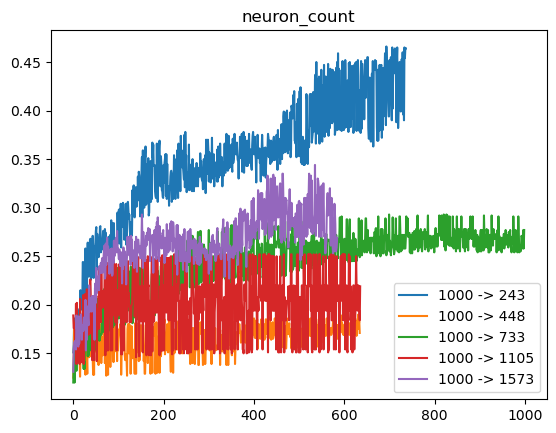

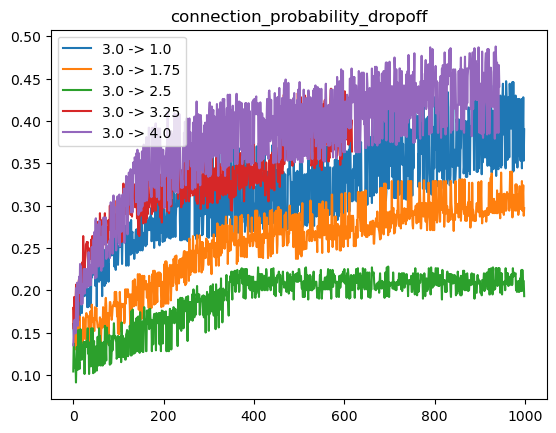

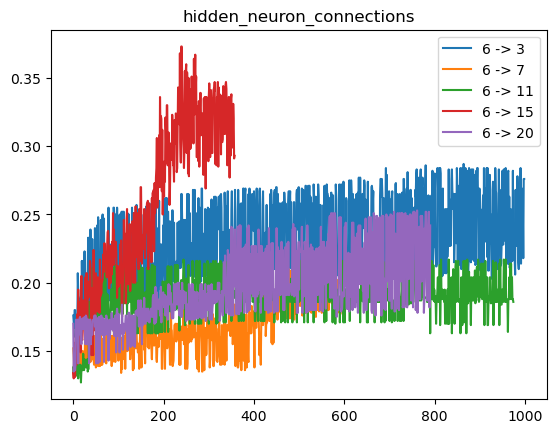

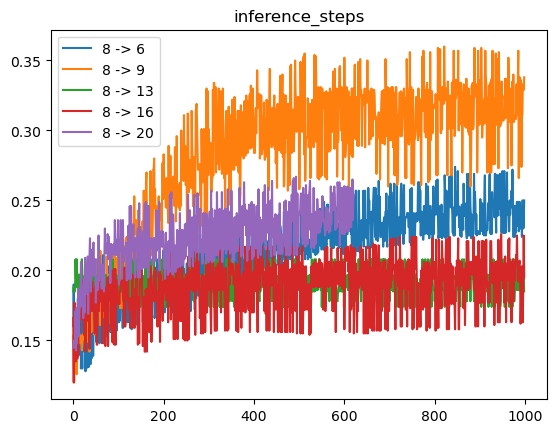

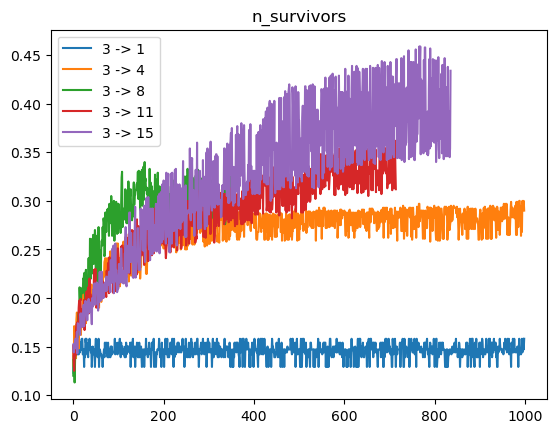

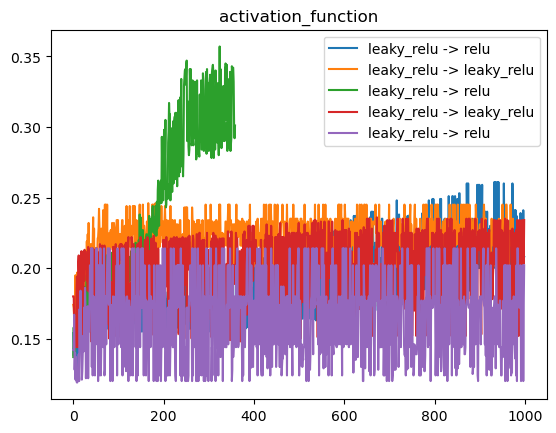

In [15]:
c = [get_configuration(i) for i in range(30)]
changes = [get_modified_param_string(i) for i in c]

for i in range(0,30,5):
    for j in range(5):
        plt.plot(txt_perf[i+j], label=str(changes[i+j][1]))  # Adding labels to the lines
    plt.legend()
    plt.title(changes[i+2][0])# Displaying the legend
    plt.savefig("generated_pdf_plots/"+changes[i+2][0]+".pdf")
    plt.show()
    

In [16]:
grouped = []
for i in range(len(bests)):
    if i%5 == 0:
        grouped.append([])
    grouped[i//5].append(bests[i])

In [17]:
print(np.array(grouped[0]).argmax())

0


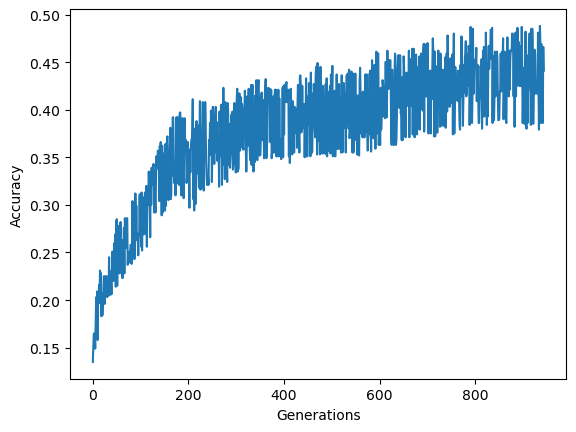

In [19]:
plt.plot(txt_perf[9])
plt.xlabel("Generations")
plt.ylabel("Accuracy")
plt.savefig("text_logs_9/best_run_4.pdf")
plt.show()